# Things we will do today...

In [1]:
# Usual imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] = 'serif'

## Averaging over a Random Control Field 

In [2]:
σ_x=np.array([[0,1],[1,0]])
σ_y=np.array([[0,-1j],[1j,0]])
σ_z=np.array([[1,0],[0,-1]])

In [3]:
def Hamiltonian(ω,δ):
    return ω*σ_z+δ*σ_x

In [4]:
H=Hamiltonian(1,0)
print(H)

[[ 1  0]
 [ 0 -1]]


In [25]:
t_list = np.linspace(0,5*np.pi,10**3)

In [170]:
ω=np.pi/2
δ=1
U = [expm(-(1j)*t*Hamiltonian(ω,δ)) for t in t_list]

In [171]:
v=np.array([0,1])

In [172]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj()@U[i].T.conj()@σ_z@(U[i].dot(v)))
    expec_gs_new[i]=np.real(v.T.conj()@U[i].T.conj()@σ_z@(U[i].dot(v)))

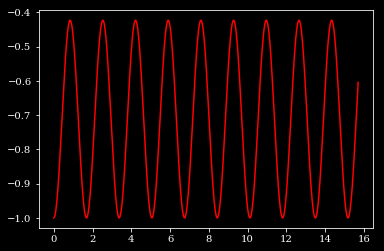

In [173]:
plt.plot(t_list,expec_gs,'r-',markersize=15)

In [206]:
ω=np.pi/2
δ=1
ɛ=δ/10
U_rand = [expm(-(1j)*t*Hamiltonian(ω,ɛ*np.random.rand())) for t in t_list]
U_real = [U[i]@U_rand[i] for i in range(len(U))]

In [204]:
expec_gs_new=np.zeros(len(U))
for i in range(len(U)):
    expec_gs_new[i]=np.real(v.T.conj()@U_real[i].T.conj()@σ_z@(U_real[i].dot(v)))

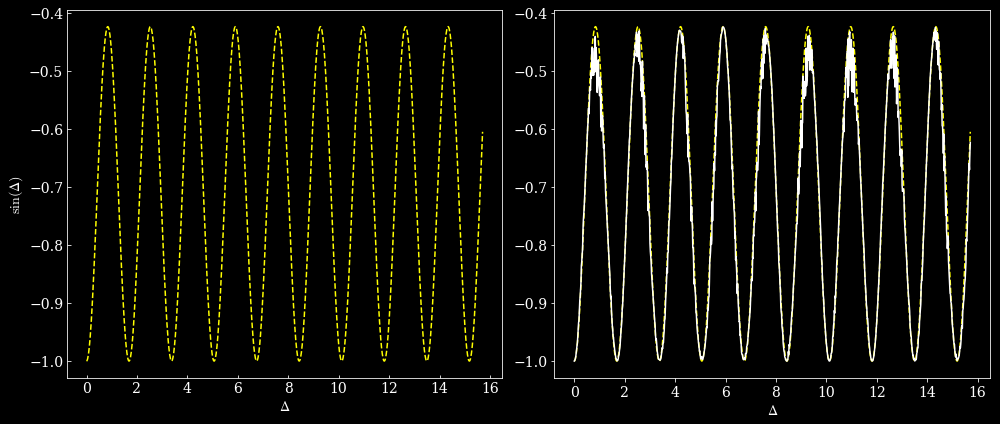

In [205]:
plt.style.use('dark_background')

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(t_list, expec_gs, ls="--", color="yellow")
ax[1].plot(t_list, expec_gs, ls="--", color="yellow")
ax[1].plot(t_list, expec_gs_new, ls="-", color="white")
ax[0].set_xlabel(r"$Δ$", fontsize=14)
ax[1].set_xlabel(r"$Δ$", fontsize=14)
ax[0].set_ylabel(r"$\sin(Δ)$", fontsize=14)
ax[0].tick_params(which="both", direction="in", labelsize=14)
ax[1].tick_params(which="both", direction="out", labelsize=14)
plt.tight_layout()
plt.savefig('funplot.pdf', transparency=True, bbox_inches='tight')
plt.show()

In [207]:
ω=np.pi/2
δ=1
ɛ=δ/3
expec_vec = np.zeros((100,len(U)))
for j in range(100):
    #U = [expm(-(1j)*t*Hamiltonian(ω,δ+ɛ*np.random.rand())) for t in t_list]
    U_rand = [expm(-(1j)*t*Hamiltonian(ω,ɛ*np.random.rand())) for t in t_list]
    U_real = [U[i]@U_rand[i] for i in range(len(U))]
    for i in range(len(U)):
        expec_vec[j,i]=np.real(v.T.conj()@U_real[i].T.conj()@σ_z@(U_real[i].dot(v)))

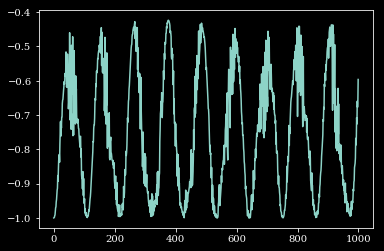

In [208]:
# Let us see what we got
plt.plot(expec_vec[0,:])

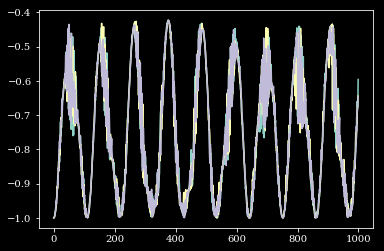

In [209]:
plt.plot(expec_vec[0,:])
plt.plot(expec_vec[1,:])
plt.plot(expec_vec[3,:])

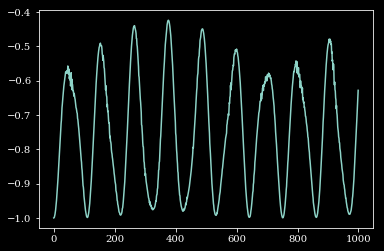

In [210]:
expec_av=[np.average(expec_vec[:,k]) for k in range(len(U))]
plt.plot(expec_av)

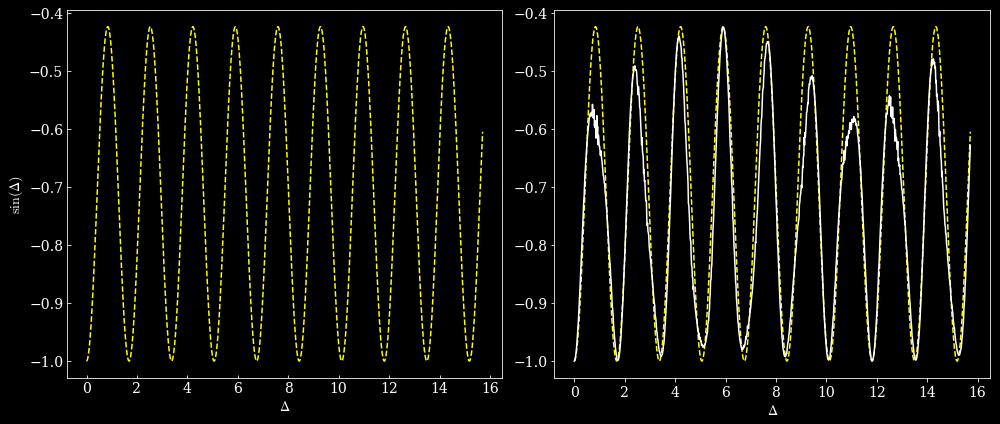

In [211]:
plt.style.use('dark_background')

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(t_list, expec_gs, ls="--", color="yellow")
ax[1].plot(t_list, expec_gs, ls="--", color="yellow")
ax[1].plot(t_list, expec_av, ls="-", color="white")
ax[0].set_xlabel(r"$Δ$", fontsize=14)
ax[1].set_xlabel(r"$Δ$", fontsize=14)
ax[0].set_ylabel(r"$\sin(Δ)$", fontsize=14)
ax[0].tick_params(which="both", direction="in", labelsize=14)
ax[1].tick_params(which="both", direction="out", labelsize=14)
plt.tight_layout()
plt.savefig('funplot.pdf', transparency=True, bbox_inches='tight')
plt.show()

## Quick Introduction to Markov Chains & Ergodic Theorem.

# area ratio = $\frac{\pi}{4}$

In [212]:
def in_circle(t):
    x,y=t[0],t[1]
    z=0
    if x**2+y**2 < 1:
        z=1
    else:
        t=np.zeros(2,)
    return z,t

In [213]:
def calculate_pi(Num):
    z=0.
    nn=0.
    trial_points=np.zeros((Num,2))
    inside_points=np.zeros((Num,2))

    for i in range(Num):
        trial_points[i,:]=-1+2*np.random.rand(2,)
        z,inside_points[i,:] = in_circle(trial_points[i,:])
        nn += z
    return 4*nn/Num,trial_points,inside_points

In [217]:
pie,t,ins=calculate_pi(10**5)

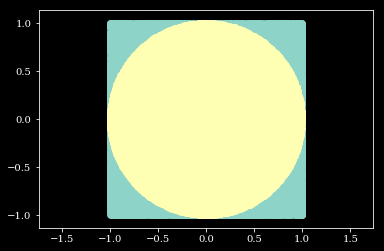

In [218]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(t[:,0],t[:,1],s=30)
plt.scatter(ins[:,0],ins[:,1],s=30)

In [219]:
pie

3.14808

# Random Walks

In [ ]:
import random

In [289]:
def random_walk(n):
    x=np.zeros(n)
    y=np.zeros(n)
    for i in range(1,n):
        #(dx,dy)=random.choice(((0,1),(0,-1),(1,0),(-1,0)))
        x[i] = x[i-1] + np.random.randint(-1,2)#dx
        y[i] = y[i-1] + np.random.randint(-1,2)#dy
    return x,y

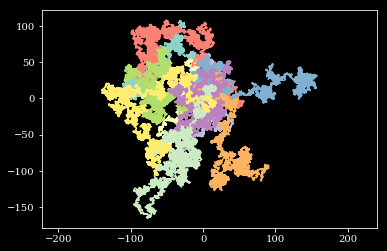

In [290]:
plt.axes().set_aspect('equal', 'datalim')
for i in range(10):
    x,y=random_walk(10**4)
    plt.plot(x,y)

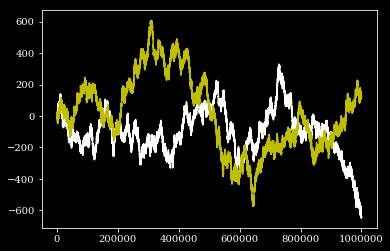

In [292]:
x,y=random_walk(10**6)
plt.plot(x,'w-')
plt.plot(y,'y')

In [288]:
np.random.randint(-1,2)

0

# Integrate $I=\int_{0}^{1}dt\frac{4}{1+t^2}$ using Monte Carlo

# Approximate the following Integrals using Monte Carlo Integration. $I=\int_{0}^{1}dt\frac{4}{1+t^4}$ and $I=\int_{-1}^{1}dt\frac{cos(t)}{1+t^2}$

![title]("assg_9_pic1.png")

![title]("assg_9_pic2.png")